In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the state abbreviations
path = '../google_trends/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.tail(12)

,State,Abbrev,Code
39,Rhode Island,R.I.,RI
40,South Carolina,S.C.,SC
41,South Dakota,S.D.,SD
42,Tennessee,Tenn.,TN
43,Texas,Tex.,TX
44,Utah,Utah,UT
45,Vermont,Vt.,VT
46,Virginia,Va.,VA
47,Washington,Wash.,WA
48,West Virginia,W.Va.,WV


In [3]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [4]:
#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in range(40, 51):
    path = f'../google_trends/google_trends_csvs/state_csvs/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]

In [5]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['SC_data_df', 'SD_data_df', 'TN_data_df', 'TX_data_df', 'UT_data_df', 'VT_data_df', 'VA_data_df', 'WA_data_df', 'WV_data_df', 'WI_data_df', 'WY_data_df'])

In [6]:
#test printing a df
print(state_codes[40])
states_df_dict[f'{state_codes[40]}_data_df'][0].head(10)

SC


,time,arts_entertainment,autos,beauty_fitness,books_lit,action_adventure,campaigns_elections,celebs,discrimination,entertainment_media,...,mobiles,online_vids,scifi_fantasy,sport_news,tv_shows,voice_vid_chat,weather,covid_cases,stay_at_home,mass_gathering_ban
0,2019-01-06,96,78,70,87,68,0,65,22,68,...,60,92,66,80,91,37,59,NaN,False,False
1,2019-01-13,95,76,73,87,74,0,66,10,83,...,61,87,54,48,79,35,68,NaN,False,False
2,2019-01-20,88,80,71,81,69,0,61,18,73,...,62,83,55,54,89,41,68,NaN,False,False
3,2019-01-27,93,76,70,83,71,0,66,17,80,...,61,94,43,44,83,48,69,NaN,False,False
4,2019-02-03,92,78,72,88,65,0,61,26,60,...,61,81,42,73,89,58,57,NaN,False,False
5,2019-02-10,95,80,68,92,58,0,63,20,72,...,64,91,51,47,78,43,70,NaN,False,False
6,2019-02-17,95,82,76,90,66,0,78,23,67,...,67,91,40,40,83,53,80,NaN,False,False
7,2019-02-24,100,84,73,94,64,0,69,25,68,...,64,87,55,45,86,70,74,NaN,False,False
8,2019-03-03,97,82,72,93,63,0,59,46,75,...,70,89,51,39,91,52,76,NaN,False,False
9,2019-03-10,93,83,68,86,55,0,68,22,66,...,64,84,46,63,84,55,58,NaN,False,False


In [7]:
col_names = list(states_df_dict[f'{state_codes[40]}_data_df'][0].columns)

In [8]:
col_names_for_max = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]

In [9]:
times_list = list(states_df_dict[f'{state_codes[40]}_data_df'][0]['time'])

In [10]:
times_list

['2019-01-06',
 '2019-01-13',
 '2019-01-20',
 '2019-01-27',
 '2019-02-03',
 '2019-02-10',
 '2019-02-17',
 '2019-02-24',
 '2019-03-03',
 '2019-03-10',
 '2019-03-17',
 '2019-03-24',
 '2019-03-31',
 '2019-04-07',
 '2019-04-14',
 '2019-04-21',
 '2019-04-28',
 '2019-05-05',
 '2019-05-12',
 '2019-05-19',
 '2019-05-26',
 '2019-06-02',
 '2019-06-09',
 '2019-06-16',
 '2019-06-23',
 '2019-06-30',
 '2019-07-07',
 '2019-07-14',
 '2019-07-21',
 '2019-07-28',
 '2019-08-04',
 '2019-08-11',
 '2019-08-18',
 '2019-08-25',
 '2019-09-01',
 '2019-09-08',
 '2019-09-15',
 '2019-09-22',
 '2019-09-29',
 '2019-10-06',
 '2019-10-13',
 '2019-10-20',
 '2019-10-27',
 '2019-11-03',
 '2019-11-10',
 '2019-11-17',
 '2019-11-24',
 '2019-12-01',
 '2019-12-08',
 '2019-12-15',
 '2019-12-22',
 '2019-12-29',
 '2020-01-05',
 '2020-01-12',
 '2020-01-19',
 '2020-01-26',
 '2020-02-02',
 '2020-02-09',
 '2020-02-16',
 '2020-02-23',
 '2020-03-01',
 '2020-03-08',
 '2020-03-15',
 '2020-03-22',
 '2020-03-29',
 '2020-04-05',
 '2020-04-

In [11]:
def boxplot_printer(ind_no):
    all_data_df = states_df_dict[f'{state_codes[ind_no]}_data_df'][0]
    data_2019_df = all_data_df.iloc[:52, :]
    data_2020_df = all_data_df.iloc[52:, :]
    
    ax = all_data_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2019+2020 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()
    
    ax = data_2019_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2019 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()
    
    ax = data_2020_df.boxplot(column=col_names_for_max, rot=65, figsize=(20,10))

    plt.title(f'2020 data for {state_codes[ind_no]}')
    plt.xlabel('category')
    plt.ylabel('popularity(%)')
    plt.show()

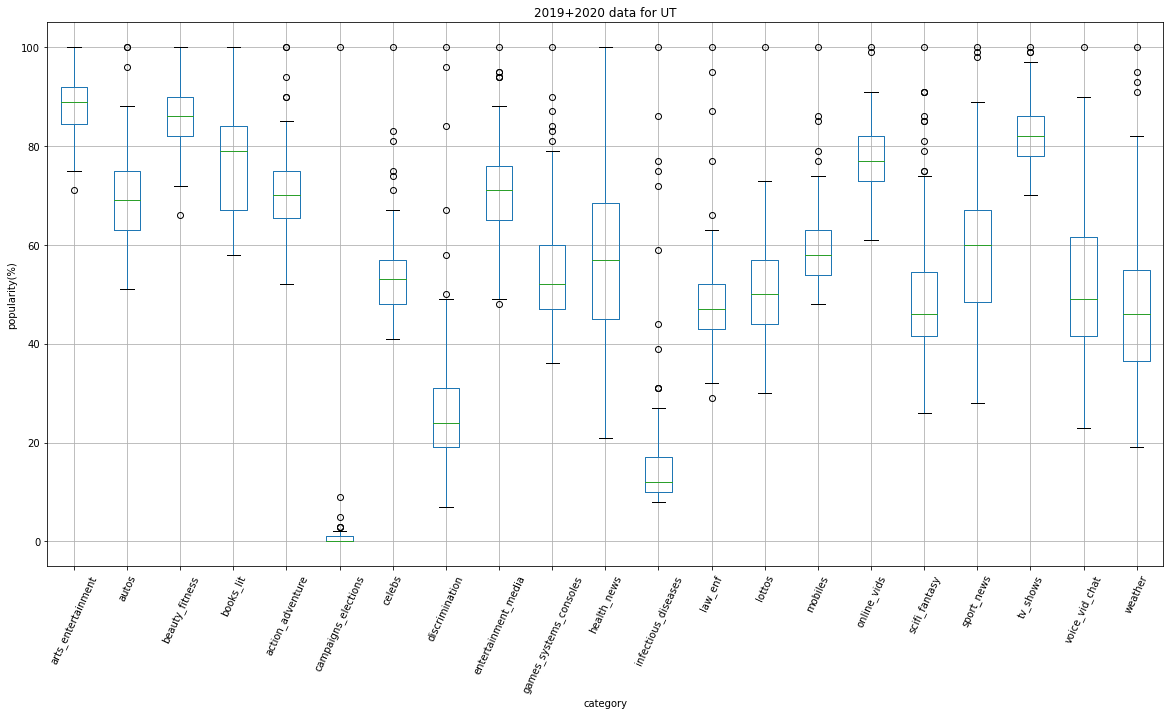

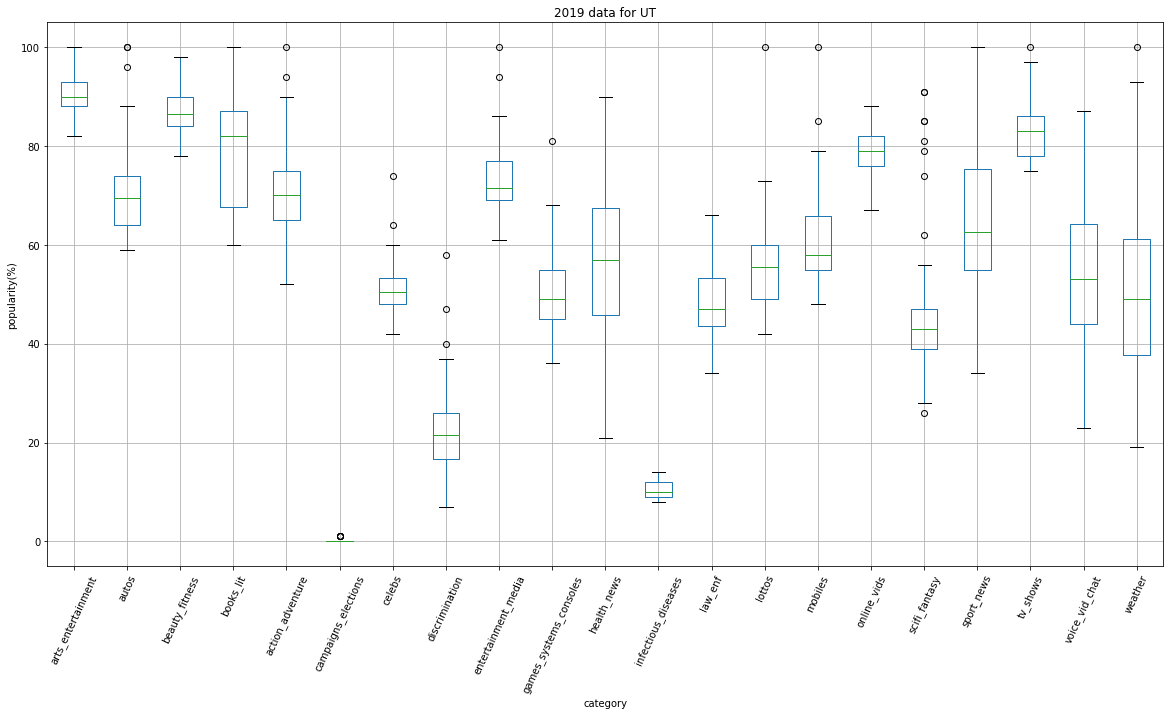

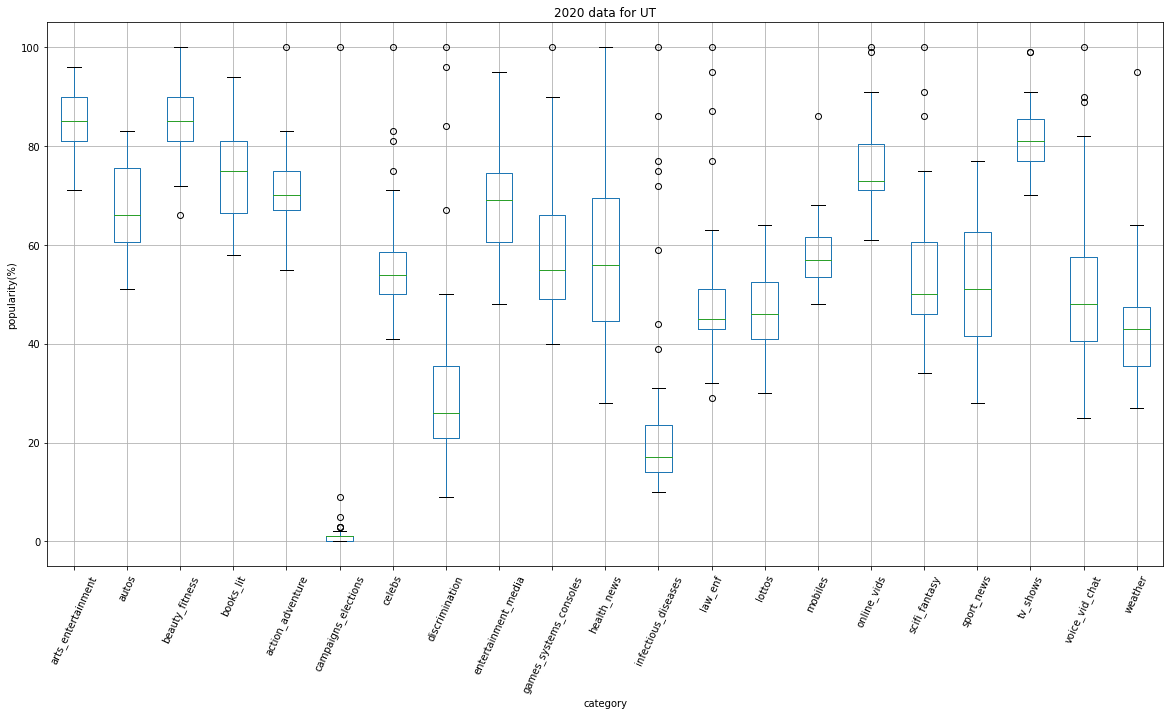

In [12]:
boxplot_printer(44)